# AULA 2
### CADERNO DE ANÁLISE EXPLORATÓRIA DE DADOS DO DATASUS (ATENDIMENTO)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [2]:
dados = pd.read_csv("csvs\\datasus_local_internacao_atendimento.csv", encoding = "utf-8", skiprows = 3, sep = ";", 
                    skipfooter = 10, engine = 'python', decimal=",")

In [3]:
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,9.291297e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,...,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,4.206680e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1.771655e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,3.050109e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,...,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4.437116e+09


In [4]:
dados[["2008/Ago", "2008/Set"]].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


Podemos descobrir as colunas usáveis utilizando o df.mean(), uma vez que ele ignora colunas que tenham valores não numéricos (em nosso caso, as células com -), como no exemplo abaixo:

In [5]:
colunas_usaveis = dados.mean().index.tolist()

Como visto acima, a utilização do .mean() acaba por esconder até a coluna com o nome dos estados. Podemos inseri-los novamente utilizando list.insert(0, "Unidade da Federação")

In [6]:
colunas_usaveis.insert(0, "Unidade da Federação")
usaveis = dados[colunas_usaveis]

In [7]:
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,9.291297e+08
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,4.206680e+08
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1.771655e+09
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,3.050109e+08
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,4.437116e+09


Para fazer mais sentido para nosso DF, vamos setar o índice para a coluna UF e assim facilitar o uso do df.loc

In [8]:
usaveis = usaveis.set_index("Unidade da Federação")

Lembrando que o uso de df['coluna'] irá trazer o índice e a coluna em uma série. Usar o df.loc['index'] devolve a linha em que o index está 

In [9]:
usaveis.loc["12 Acre"]

2007/Ago    1.047007e+04
2007/Set    1.400171e+04
2007/Out    8.620085e+04
2007/Nov    3.013237e+05
2007/Dez    7.696124e+05
                ...     
2020/Abr    2.472063e+06
2020/Mai    2.383895e+06
2020/Jun    2.199921e+06
2020/Jul    1.163813e+06
Total       4.206680e+08
Name: 12 Acre, Length: 157, dtype: float64

Iremos dropar a coluna "total" para que possamos plotar o gráfico sem que ele sofra skew

In [10]:
usaveis = usaveis.drop("Total", axis = 1)

Utilizaremos o df.T para transpor o gráfico e modificar o plot:

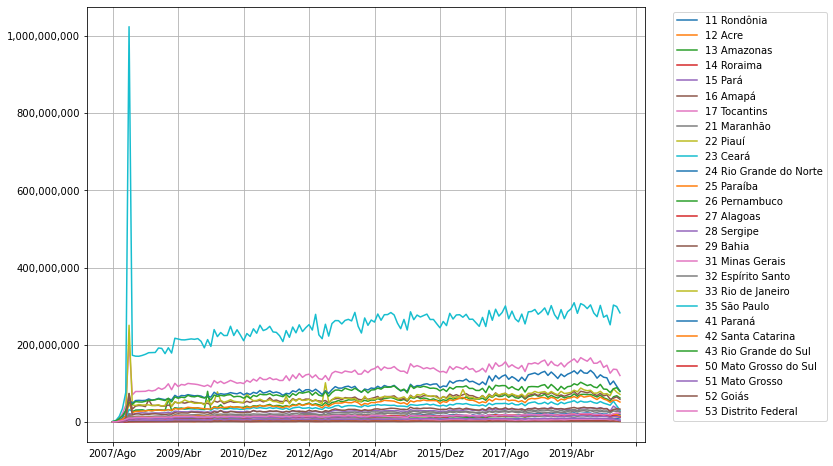

In [11]:
ax = usaveis.T.plot(figsize=(10,8))

plt.legend(bbox_to_anchor = (1.04, 1), loc="upper left")
plt.grid()

formattery = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formattery)

Verifiquei o skew nos valores do gráfico e identifiquei que a diferença entre os valores do mês de dezembro de 2007 e os outros meses era gritante em diferentes estados.

In [12]:
pd.set_option('display.max_rows', None)
usaveis.T

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,...,57408.11,4.694693e+05,1.665350e+06,5.548002e+05,693955.05,1.049252e+06,199556.12,63562.50,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,...,284224.80,9.216466e+05,4.434169e+06,1.431708e+06,1092964.12,3.182913e+06,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,...,1152115.25,2.994665e+06,1.457740e+07,4.630402e+06,3562300.82,8.571312e+06,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,...,2296383.23,7.250528e+06,3.503226e+07,1.112003e+07,7578502.38,1.659243e+07,1995899.52,1740439.60,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,...,5724199.54,1.362712e+07,7.666855e+07,2.879072e+07,14772555.10,3.013426e+07,4277979.14,5394225.43,9293914.78,7121965.42
2008/Jan,1829559.71,1731744.62,11419210.08,808448.39,21762104.16,1329876.61,5136474.61,21551600.33,11375419.37,32444328.54,...,16212109.41,2.505650e+08,1.023565e+09,5.808133e+07,53034384.67,5.106461e+07,8301006.10,8213438.64,74063828.22,10561085.46
2008/Fev,1940792.63,1743978.66,7934652.10,771687.83,20126081.01,1275063.72,5051932.07,13452263.93,9711680.20,27643304.86,...,10032886.43,4.412259e+07,1.728349e+08,4.885505e+07,24409572.92,4.589770e+07,8279288.79,7929894.93,18149374.27,10215956.80
2008/Mar,1955721.68,2057439.02,8641517.13,876091.18,22149375.82,1177745.93,5200151.87,14750895.33,10428191.09,30085370.22,...,12262049.08,4.289267e+07,1.704818e+08,5.561179e+07,27483480.50,5.292870e+07,9793888.78,9416367.68,20992213.03,11627918.26
2008/Abr,2143353.81,2057829.69,8531576.49,896952.53,23436682.75,1396371.51,5343714.73,15148647.11,10227943.00,31376221.00,...,12453466.98,4.529596e+07,1.702783e+08,5.611514e+07,27806641.44,5.197242e+07,8997542.75,9390588.03,21049477.30,11922015.36
2008/Mai,2280382.58,2226577.93,9079902.15,1027288.73,23861080.80,1411520.77,5344487.99,14543679.92,10562148.66,31189904.62,...,11789786.09,4.395135e+07,1.724022e+08,5.557483e+07,28354279.52,5.167935e+07,9842108.59,9378197.25,19162546.79,11900817.00


### Desafio 02: Plotar o gráfico de linha com apenas 5 estados de sua preferência

Text(0.5, 1.0, 'Gastos mensais (em R$) entre Fevereiro de 2008 e Julho de 2020 da região Sul e Sudeste')

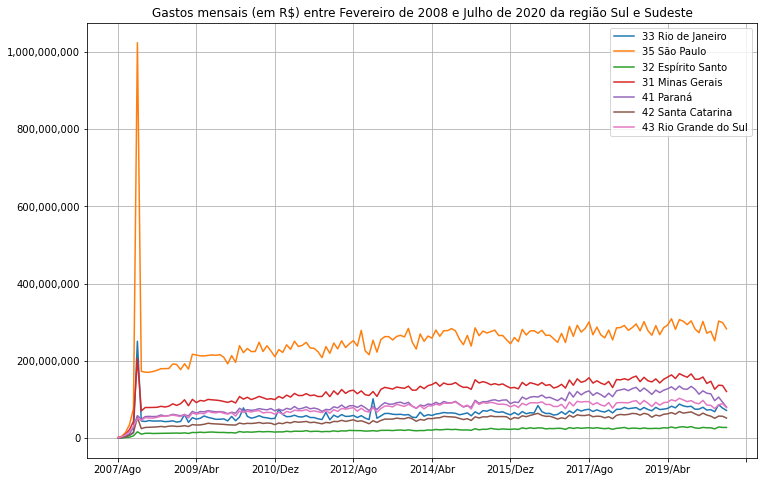

In [13]:
pd.set_option('display.max_rows', 10)
ax = usaveis.loc[["33 Rio de Janeiro","35 São Paulo","32 Espírito Santo","31 Minas Gerais","41 Paraná","42 Santa Catarina","43 Rio Grande do Sul"]].T.plot(figsize=(12,8))

plt.legend(loc="upper right")
plt.grid()
formattery = ticker.StrMethodFormatter('{x:,.0f}')
ax.yaxis.set_major_formatter(formattery)
plt.title("Gastos mensais (em R$) entre Fevereiro de 2008 e Julho de 2020 da região Sul e Sudeste")